## Date Data Visualisation

Questions to answer:
1. What are distributions of the date data features?
2. Are there any linearly correlated features?
3. What are the main differences in the numerical measurements for different responces 0 and 1?

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


feature_names = ['L3_S30_D3496', 'L3_S30_D3506',
                 'L3_S30_D3501', 'L3_S30_D3516',
                 'L3_S30_D3511', 'L3_S37_D3951',
                 'L3_S34_D3883', 'L3_S47_D4190',
                 'L3_S38_D3961', 'L3_S32_D3852',
                 'L3_S29_D3480', 'L0_S4_D106',
                 'L0_S3_D102',   'L3_S35_D3891',
                 'L0_S1_D26',    'L0_S21_D484',
                 'L3_S36_D3940', 'L0_S16_D428', 
                 'L3_S33_D3874', 'L3_S36_D3925',
                 'L2_S26_D3096', 'L2_S27_D3219',
                 'L0_S0_D23',    'L3_S29_D3492',
                 'L0_S11_D328',  'L0_S10_D231',
                 'L0_S6_D134',   'L0_S9_D152',
                 'L0_S2_D66',    'L0_S7_D143',
#             'L0_S5_D117',   'L0_S8_D150',              
#             'L0_S14_D392',  'L0_S18_D451',
#             'L0_S17_D434', 'L0_S19_D460',
#             'L0_S23_D673', 'L1_S24_D1760',
]

In [51]:
date_cols = pd.read_csv("train_date.csv", nrows = 1).columns.values
ids = [np.argwhere(feature_name == date_cols)[0][0] for feature_name in feature_names]
train = pd.read_csv("train_date.csv", 
                index_col = 0, header = 0, usecols = [0, len(date_cols) - 1] + ids)

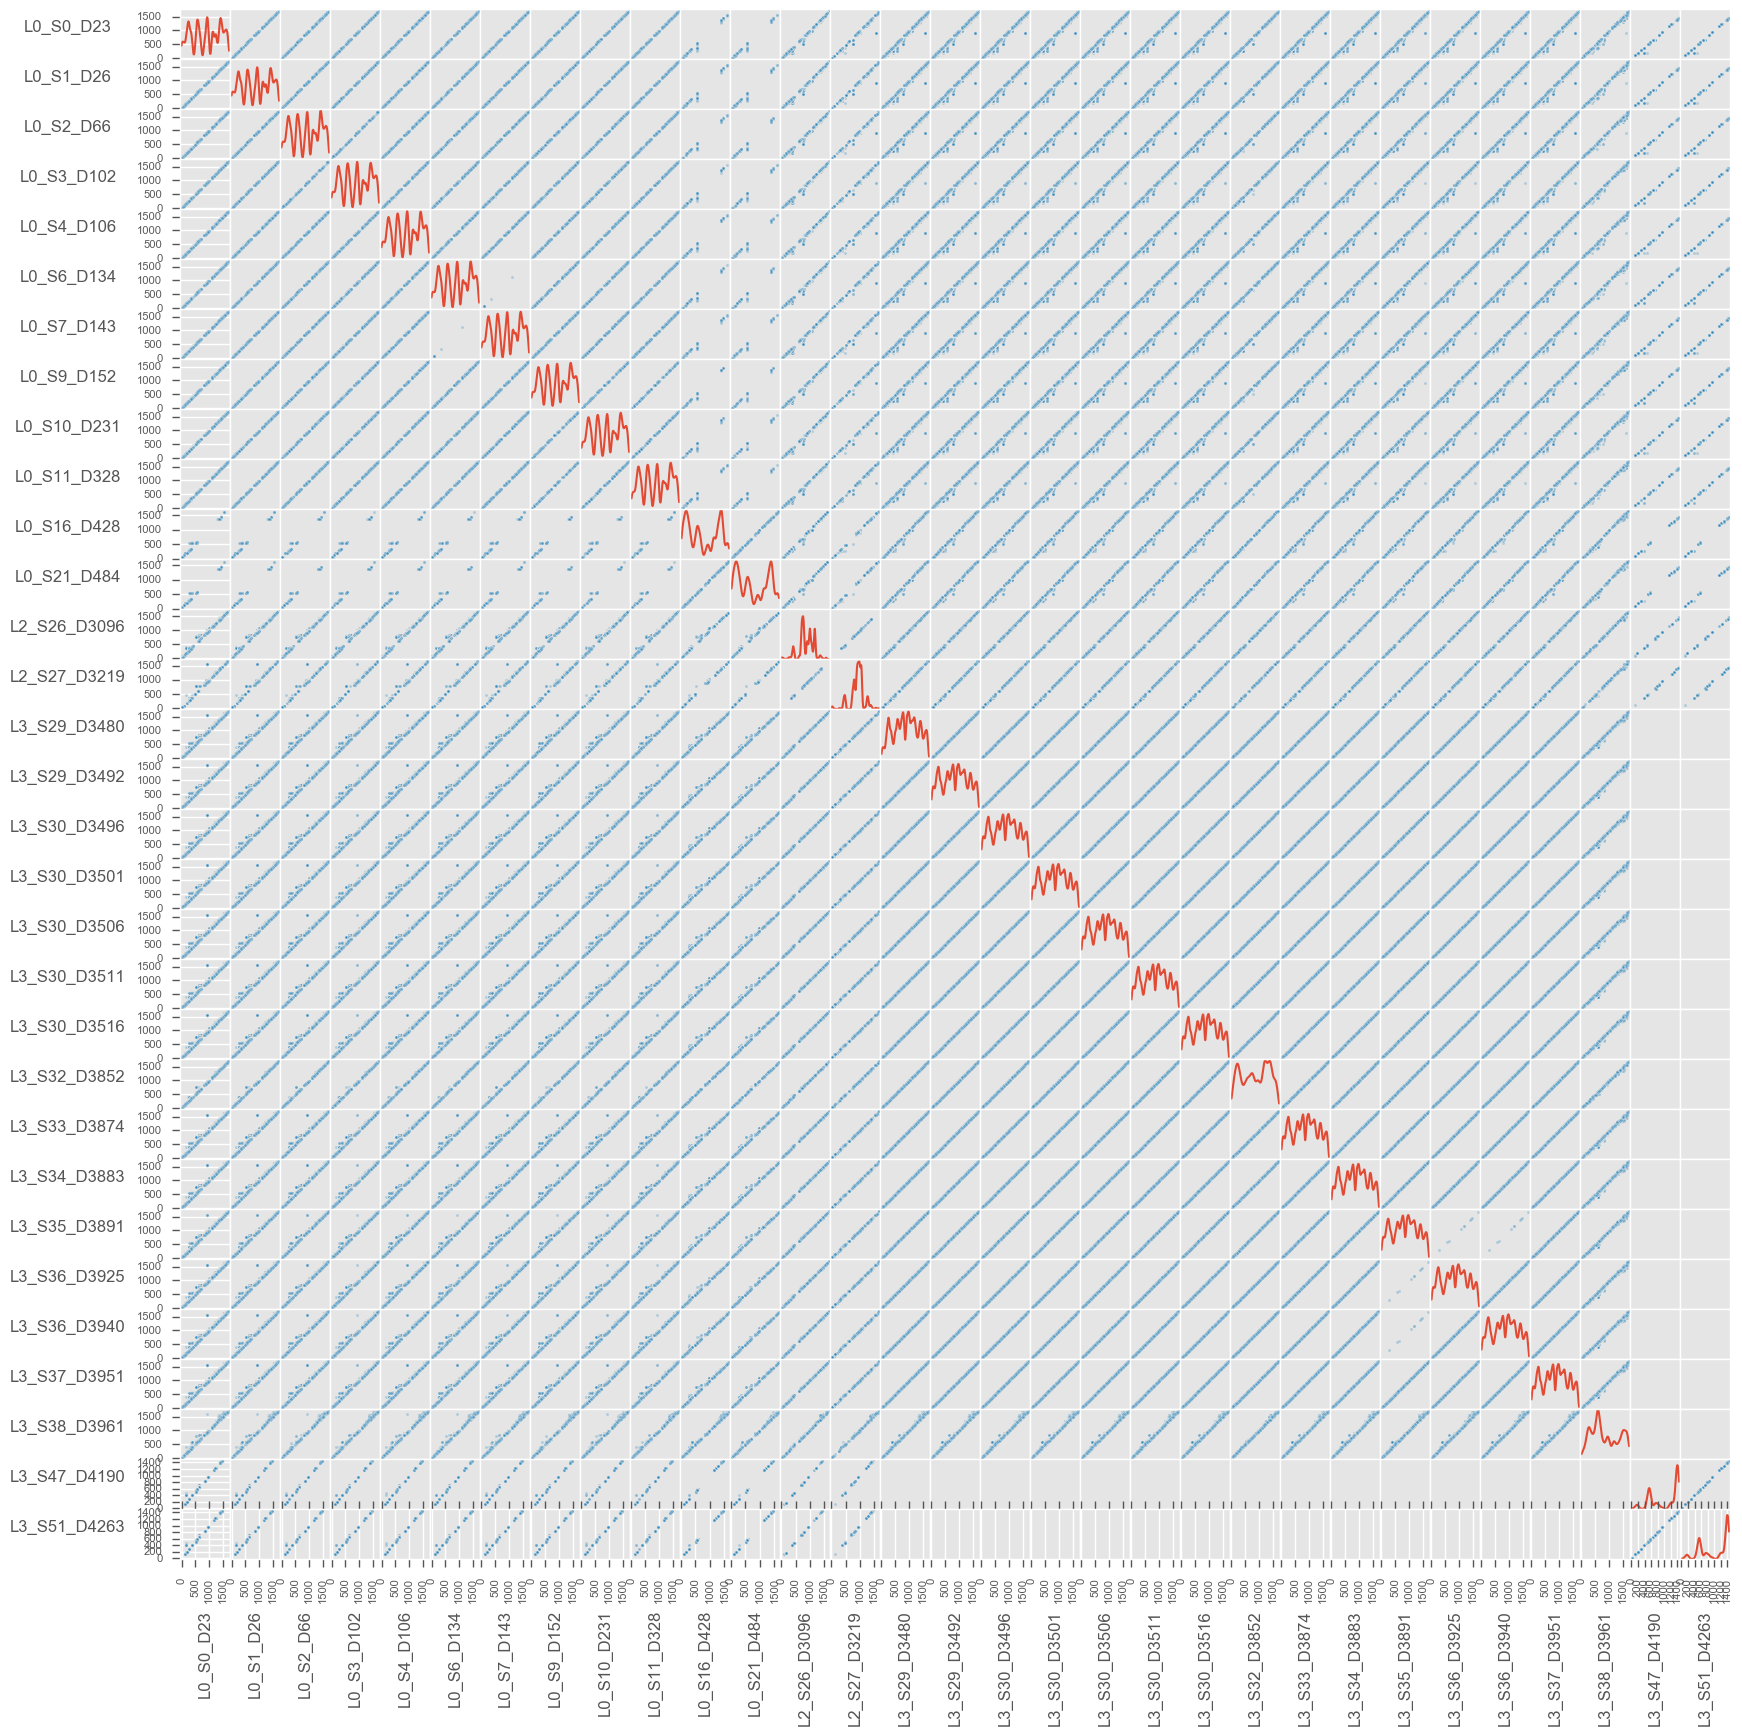

In [52]:
# Produce a scatter matrix for each pair of features in the data
#colors=['red','green']
import matplotlib
matplotlib.style.use('ggplot')
cols = [col for col in train.columns if col not in ['Response']]
axs = pd.scatter_matrix(train[cols], alpha = 0.3, 
                  figsize = (20,20), 
                  diagonal = 'kde', 
#                  marker='x', 
#                  c=train.Response.apply(lambda x:colors[x]),
)
n = len(cols)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50        

All the features represent the rime series and are not normally distributed. They are all linearly correlated with some exceptions.

In [53]:
resp = pd.read_csv("train_numeric.csv", index_col = 0, header = 0, usecols = ['Id', 'Response'])
train = pd.concat([train, resp], axis=1)

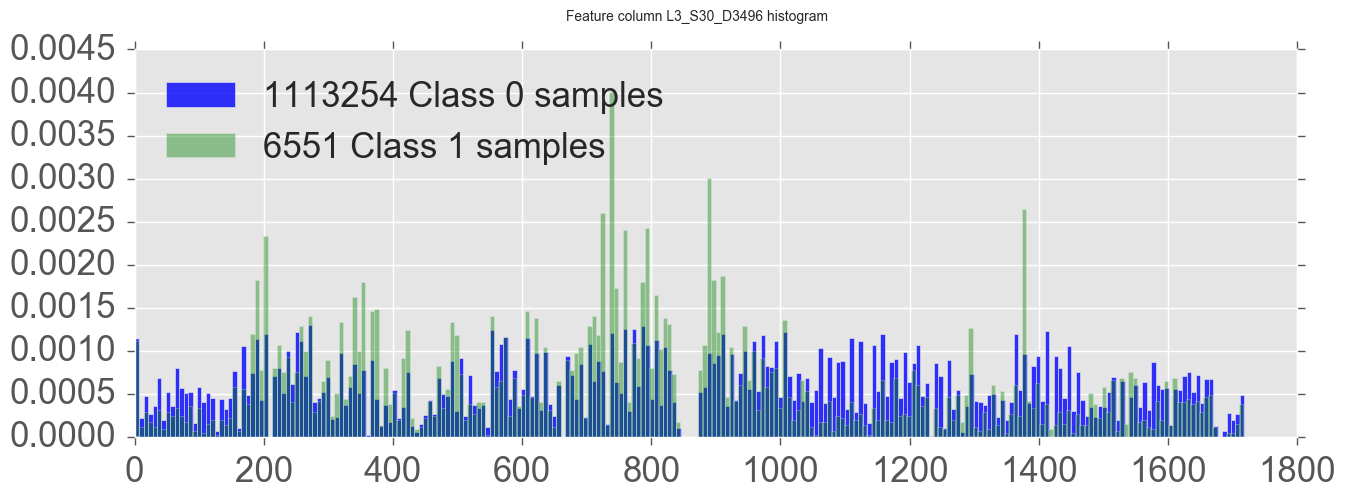

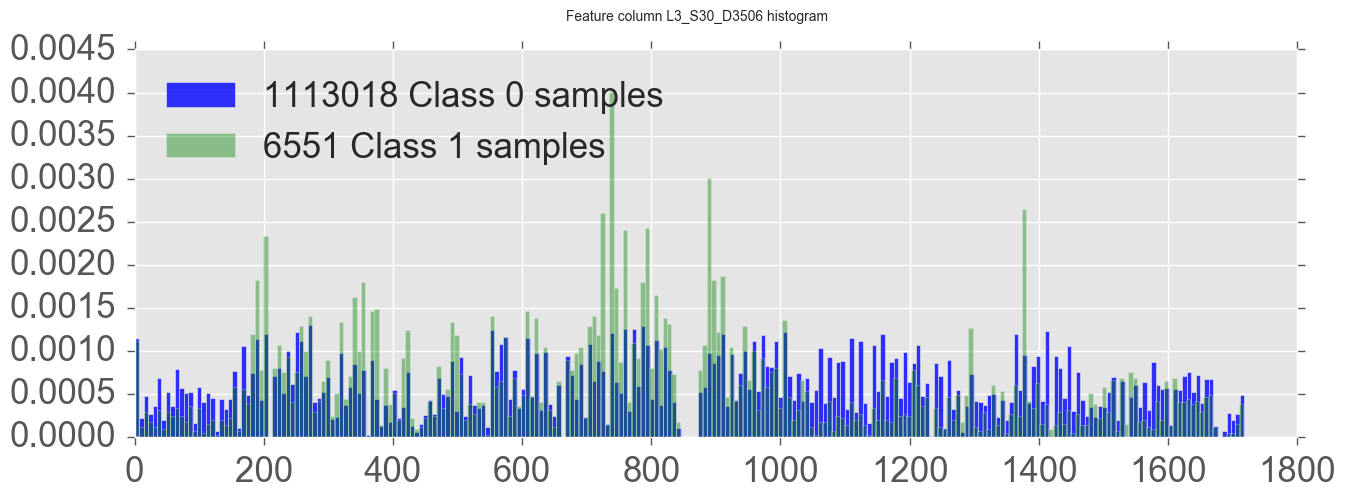

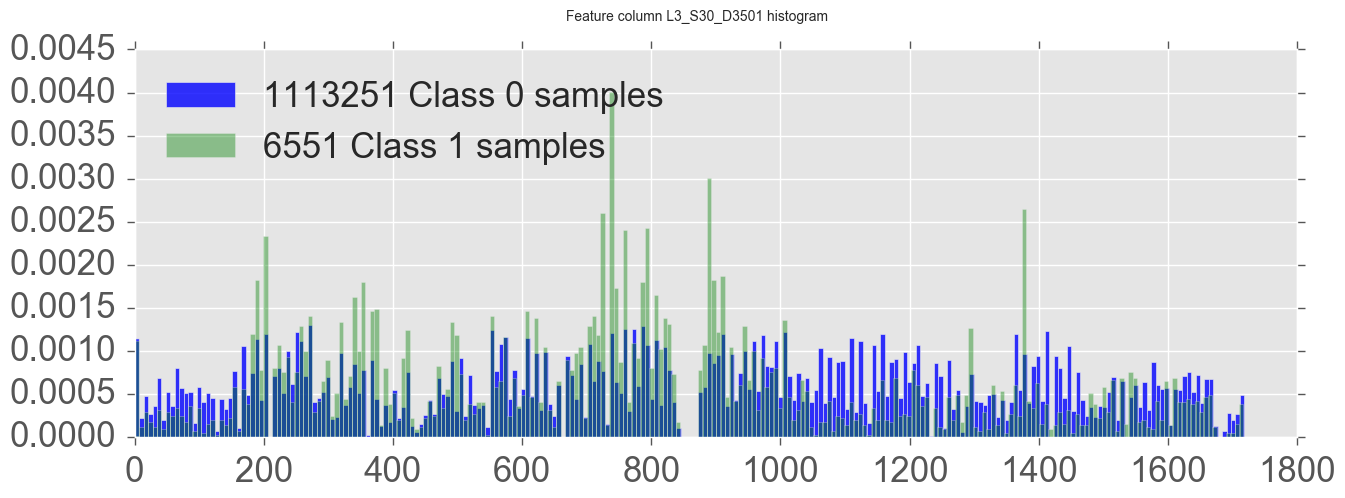

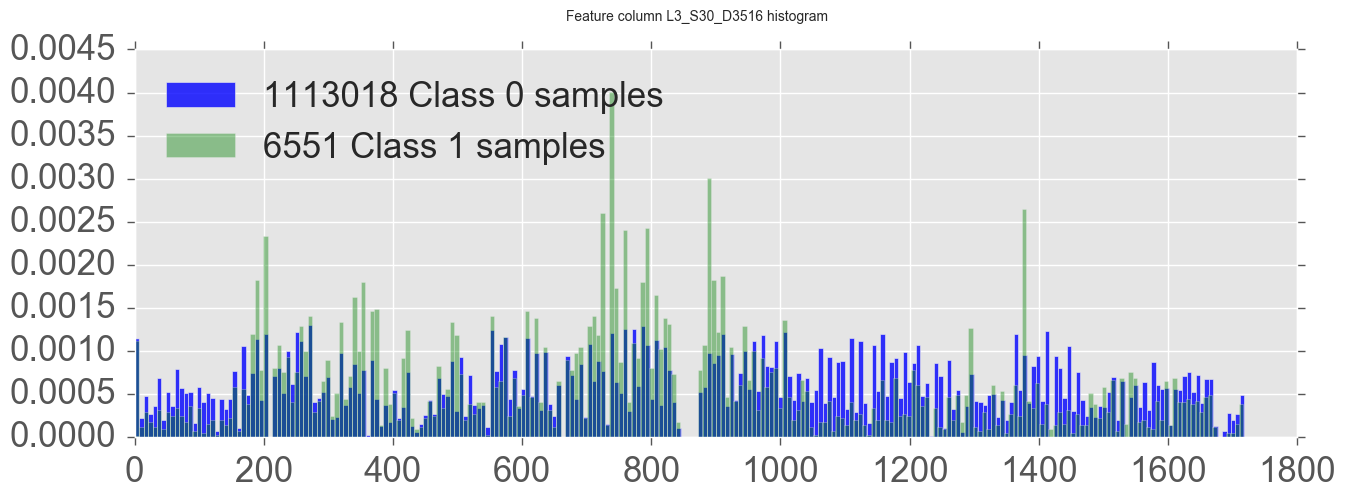

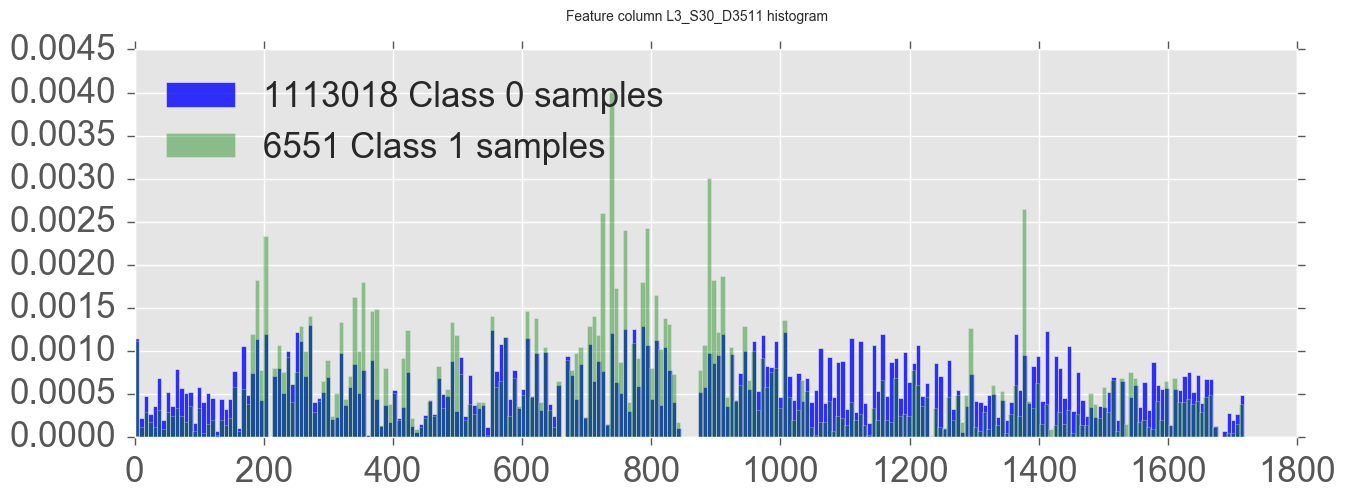

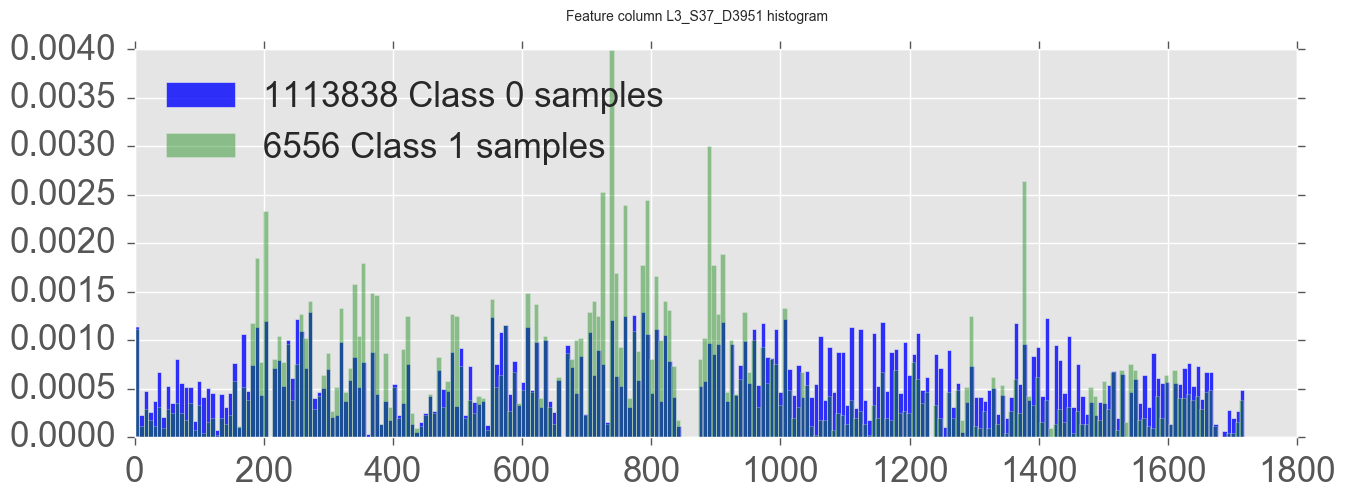

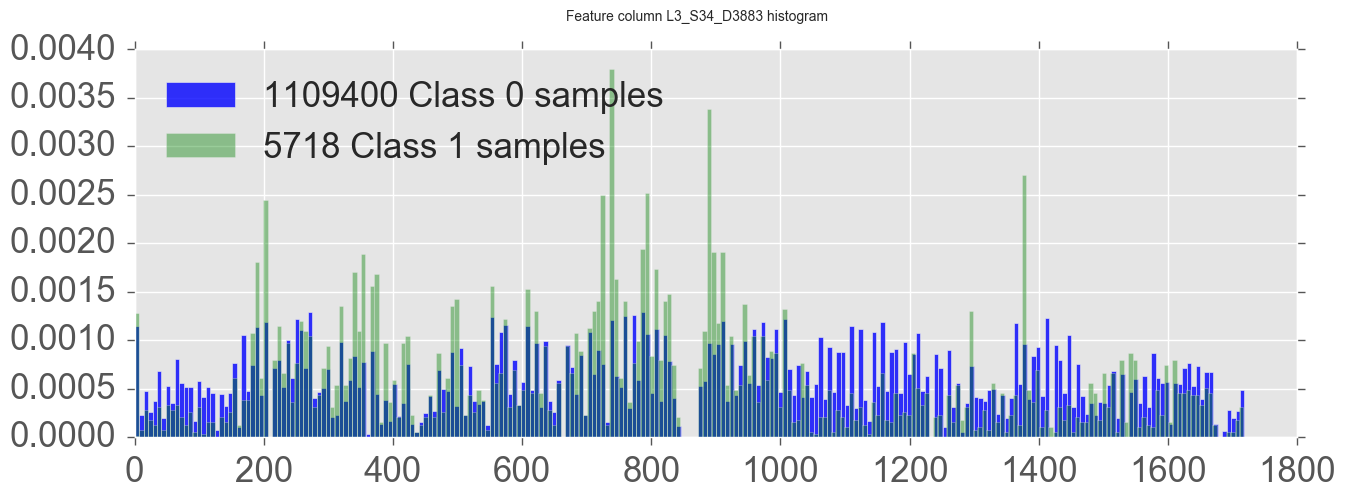

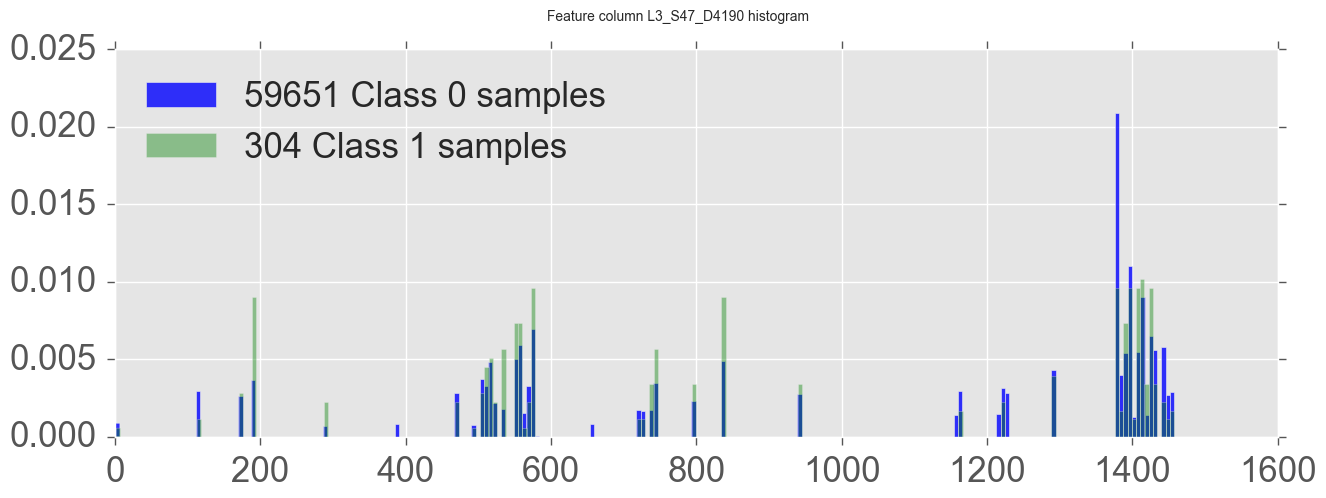

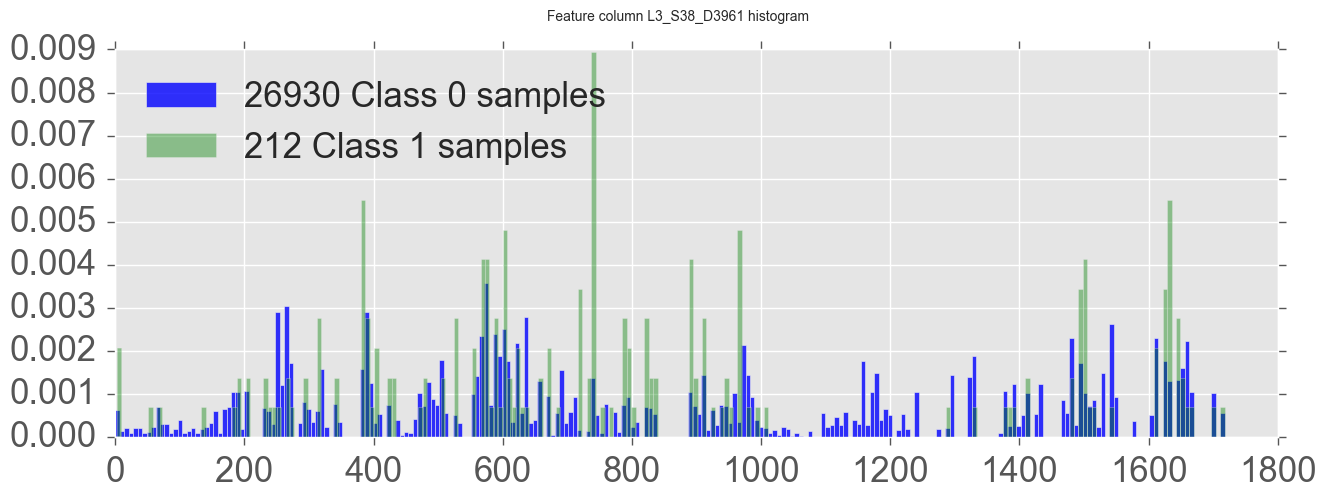

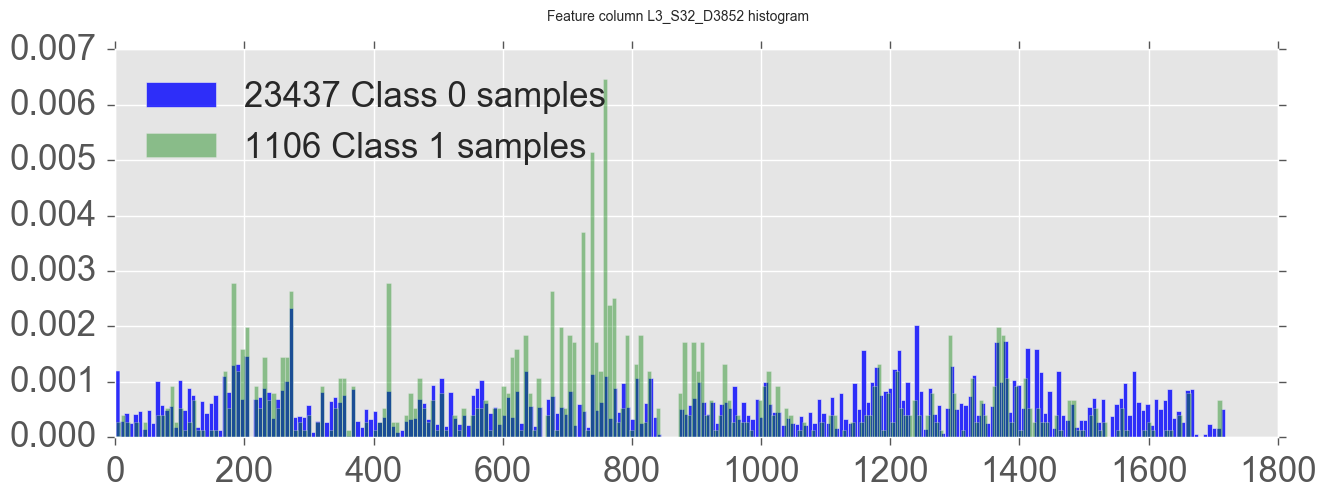

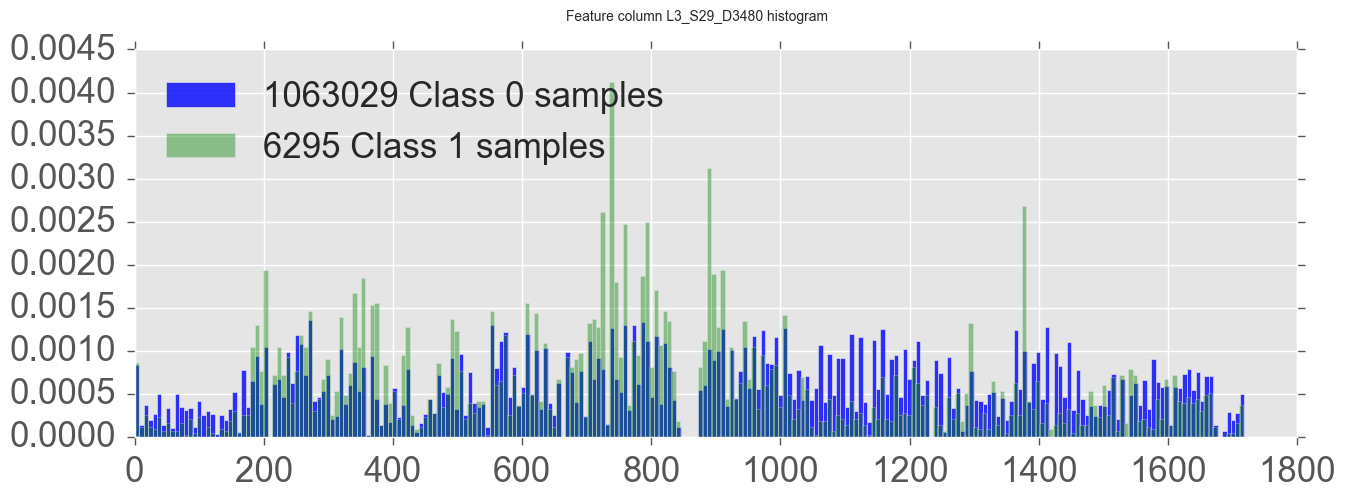

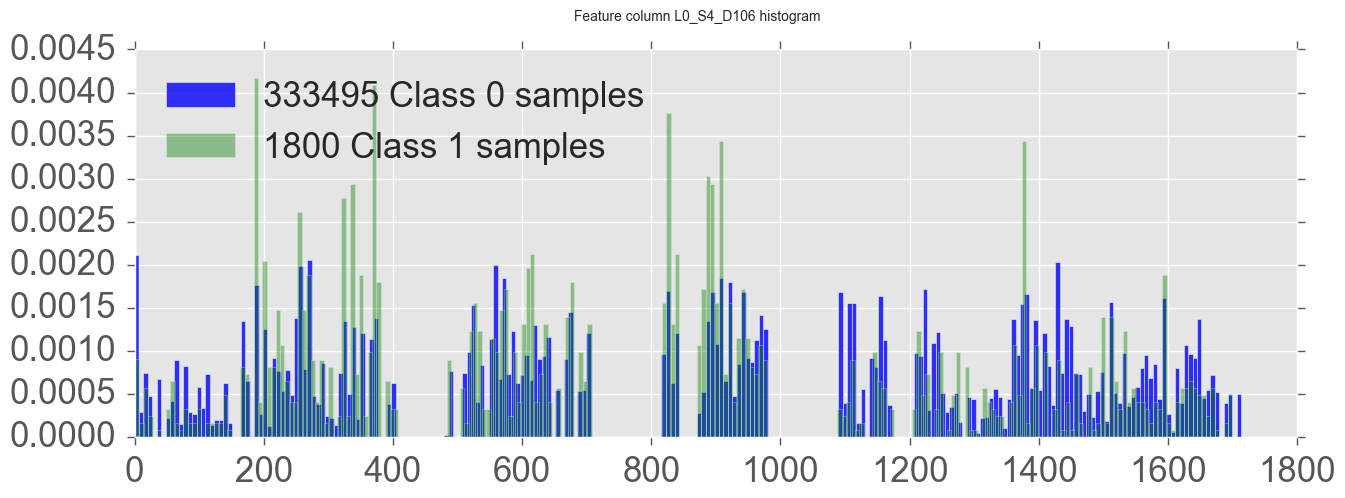

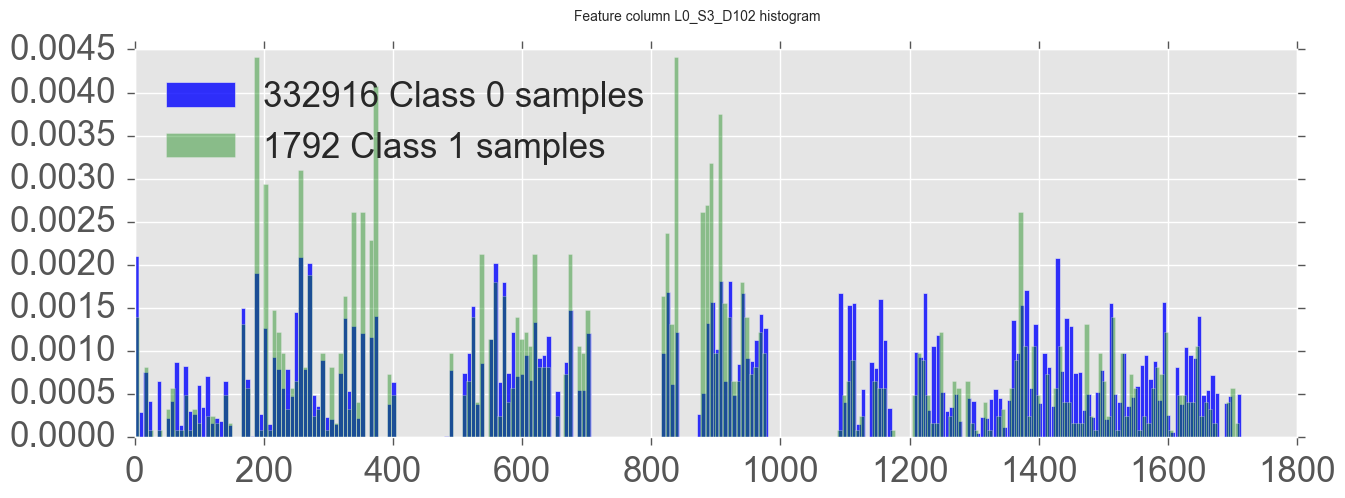

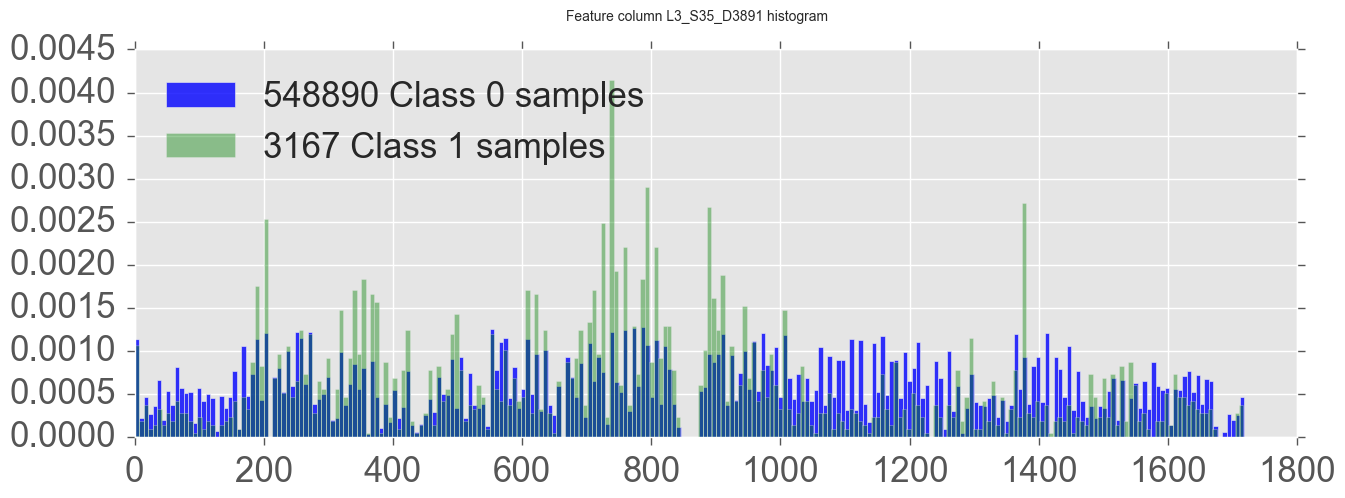

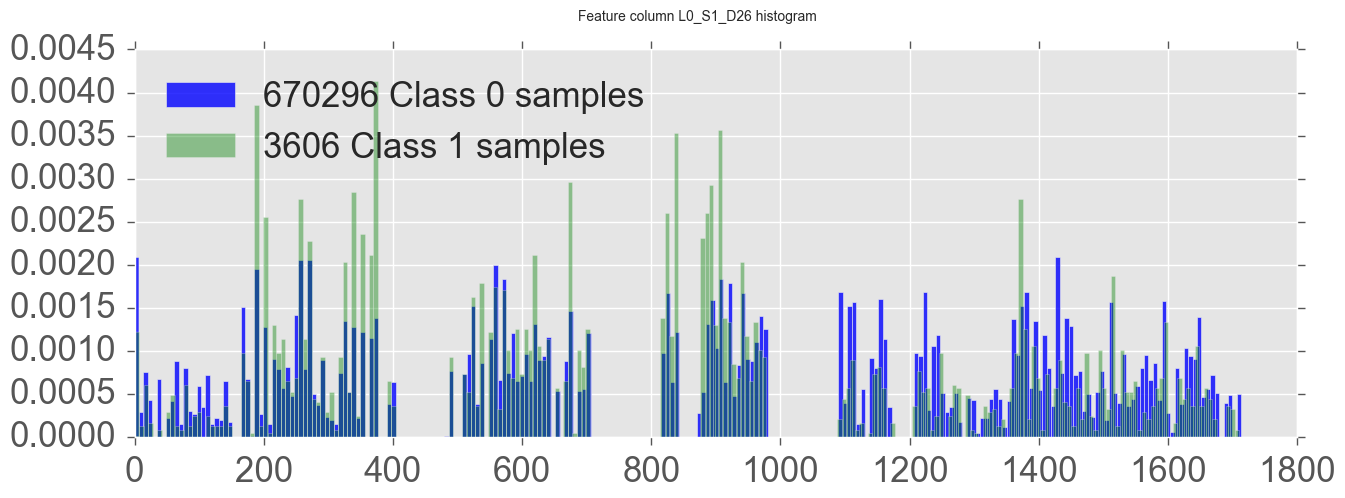

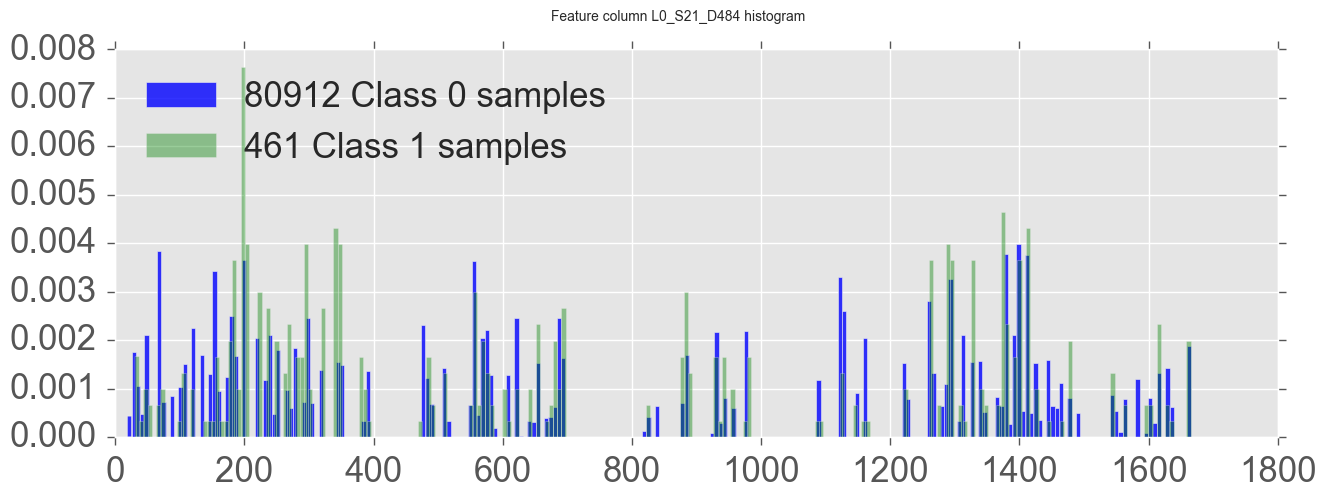

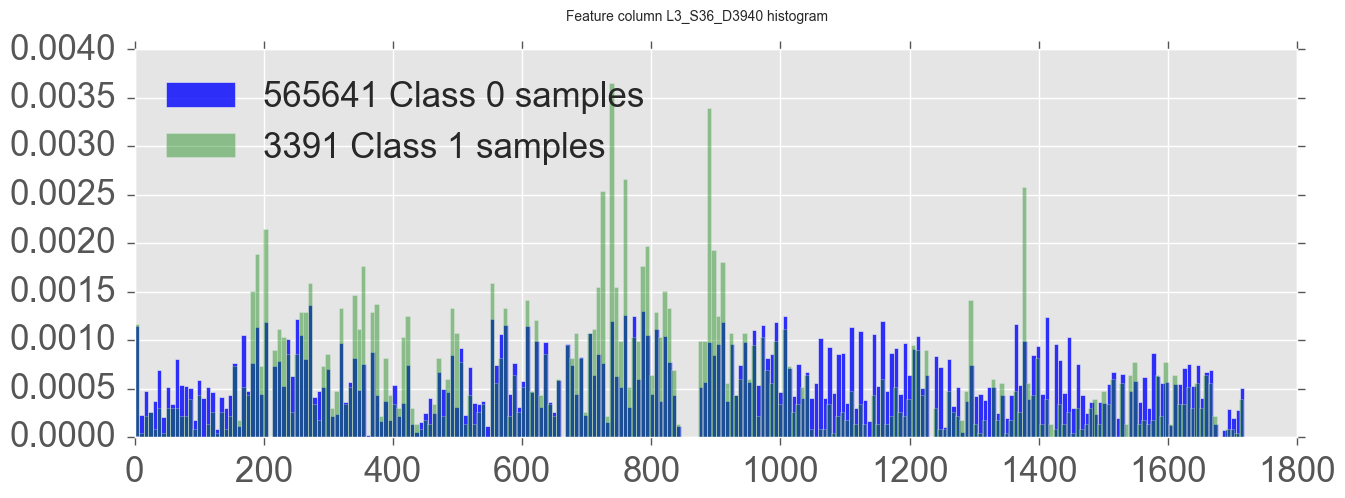

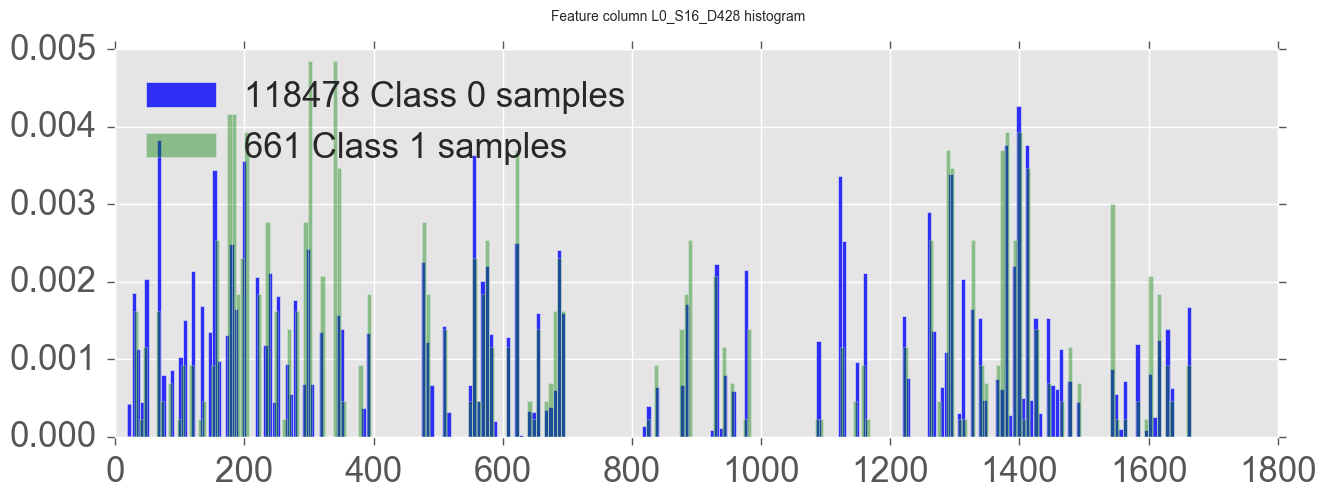

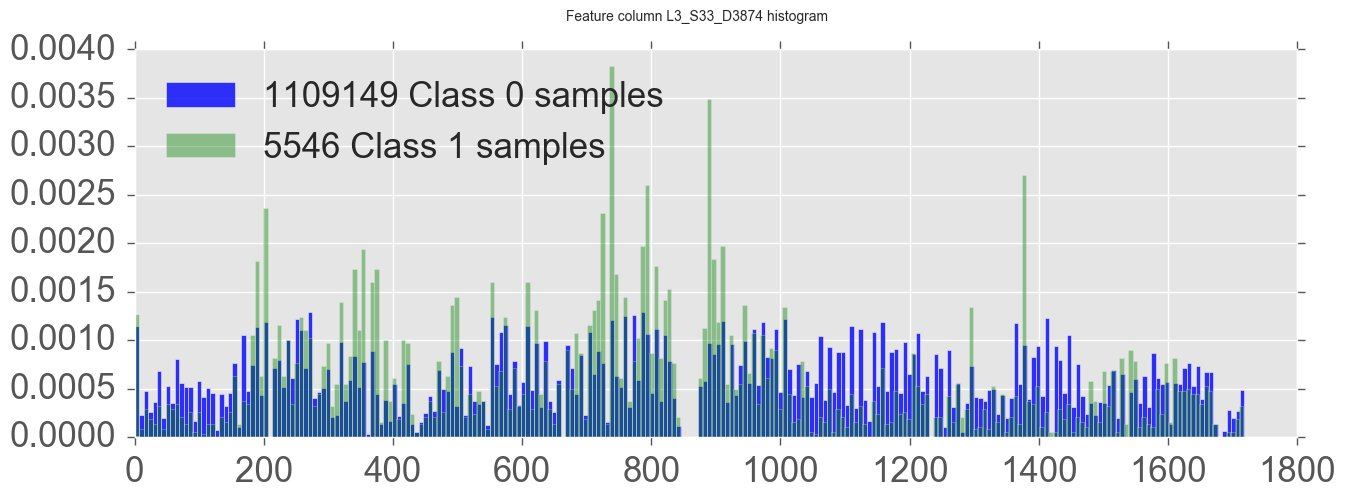

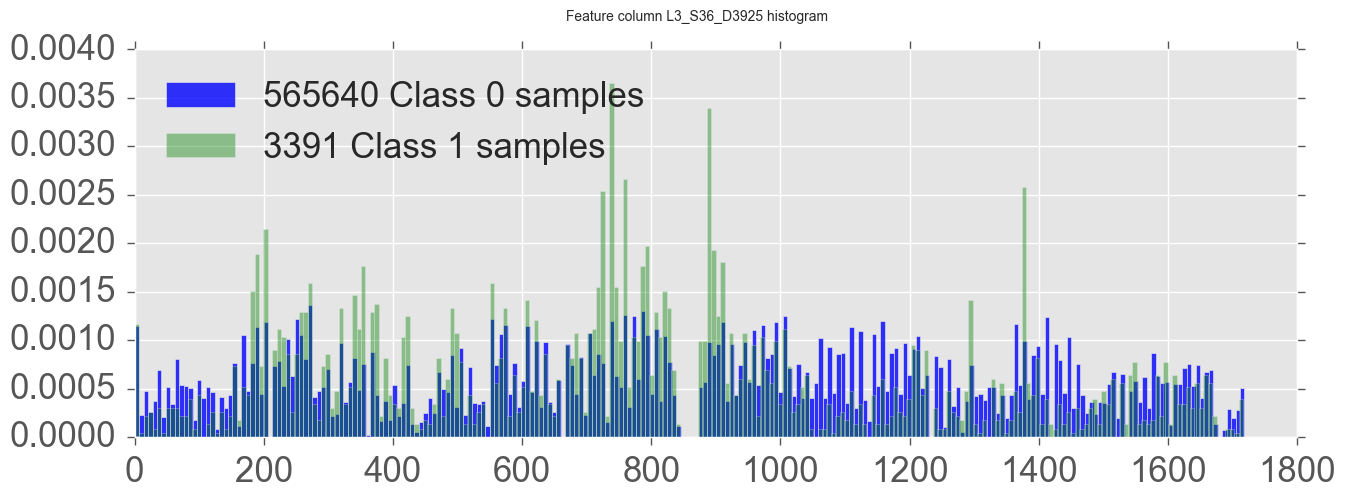

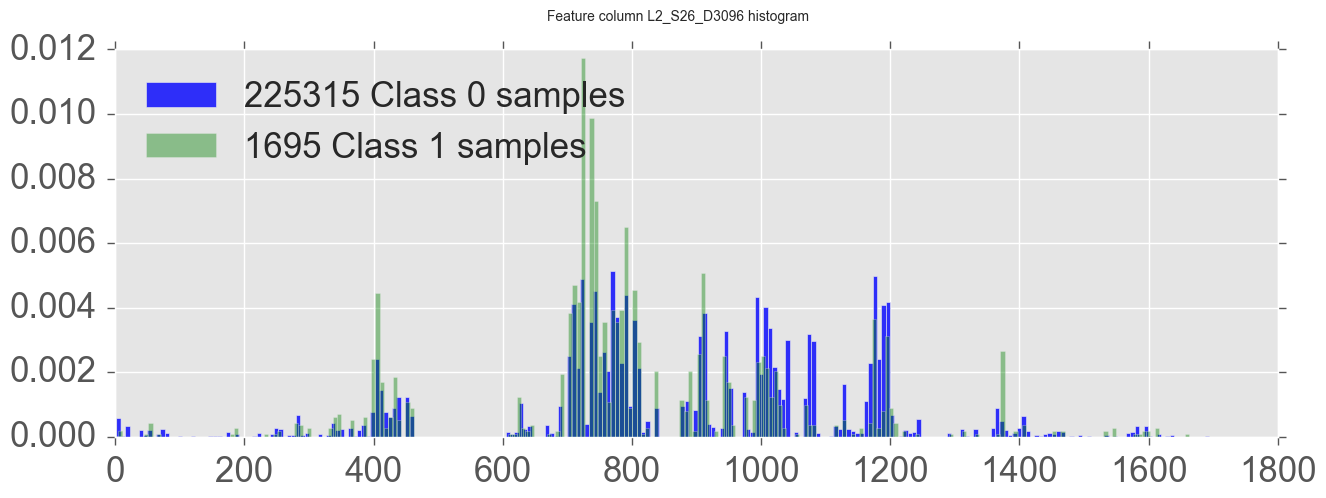

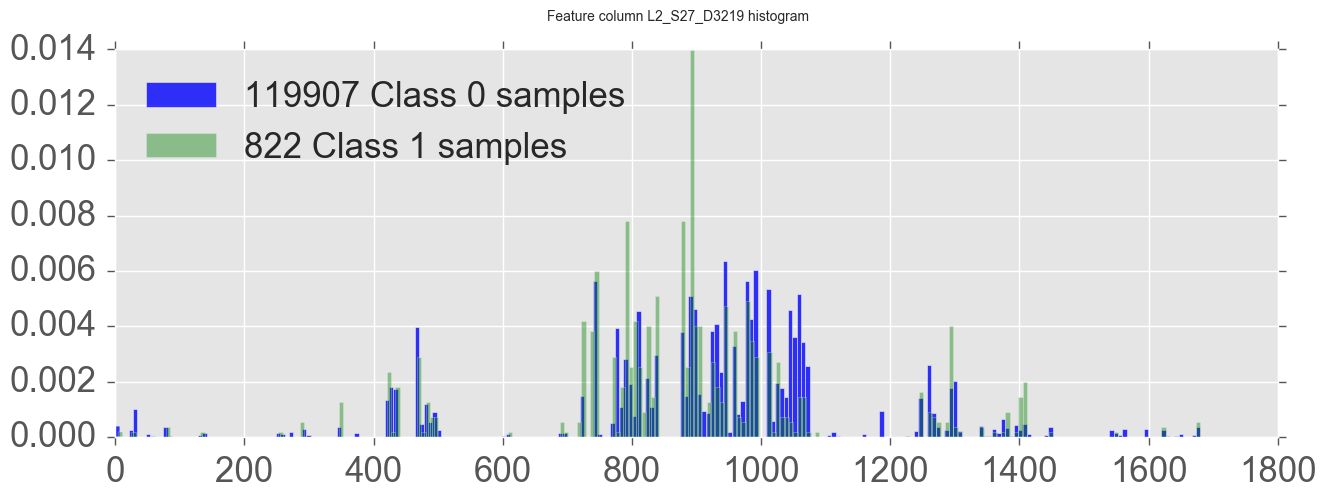

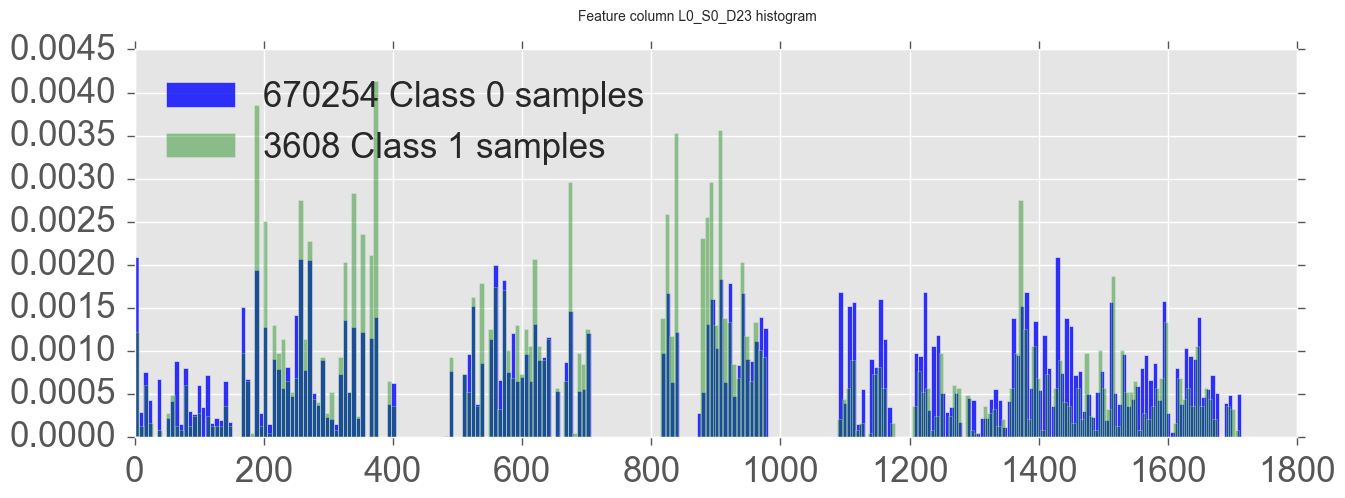

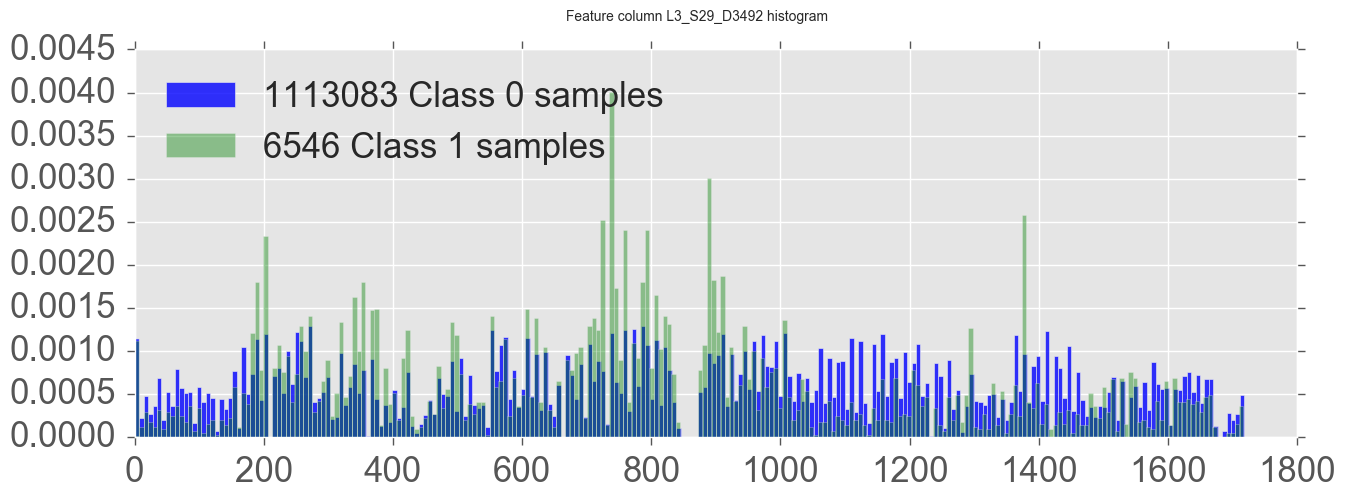

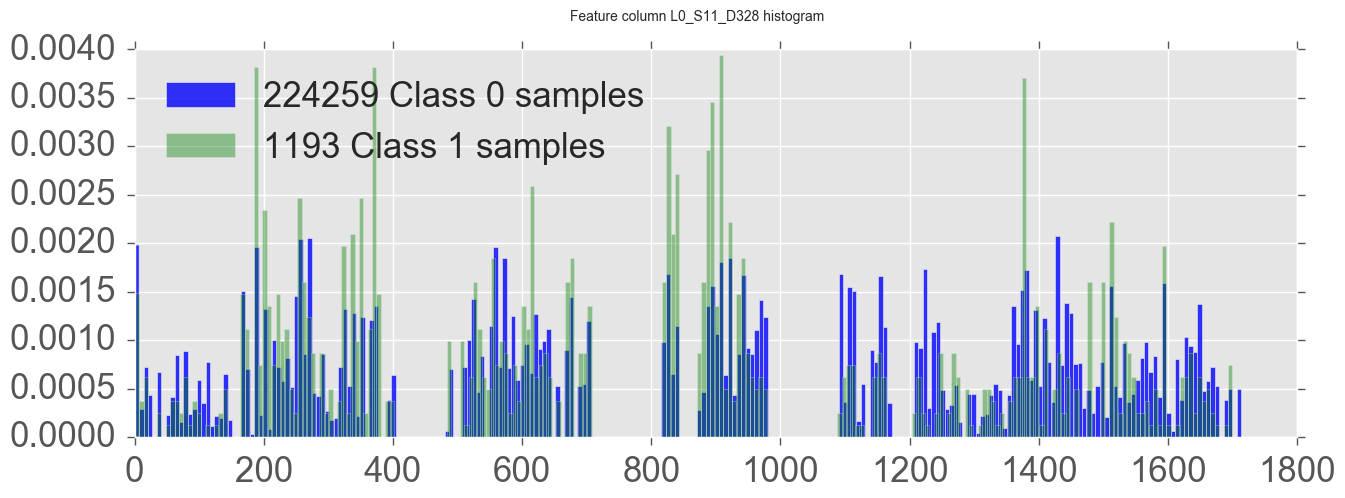

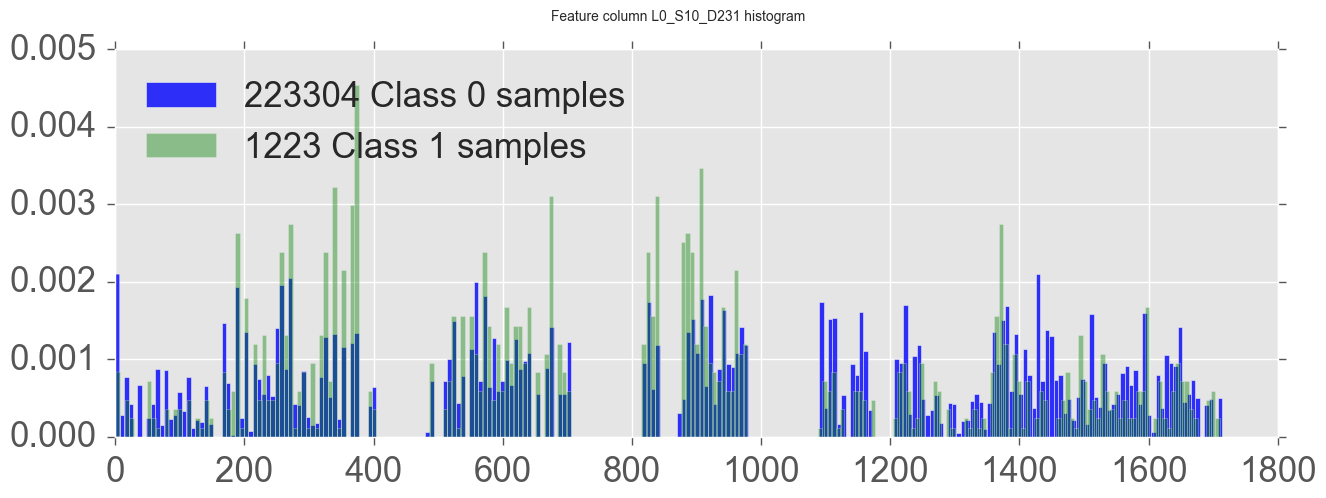

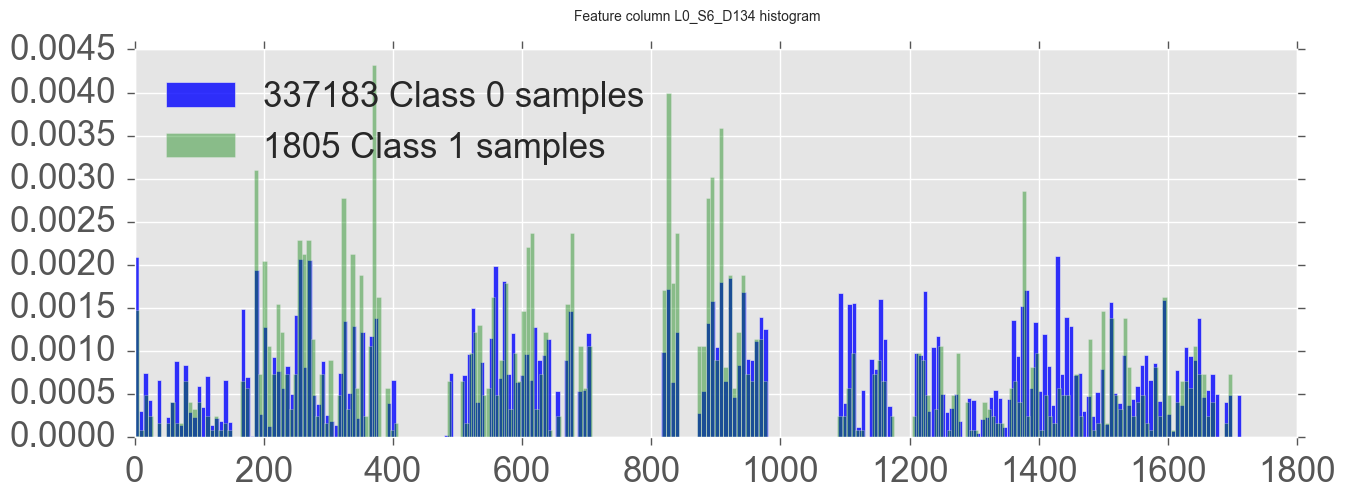

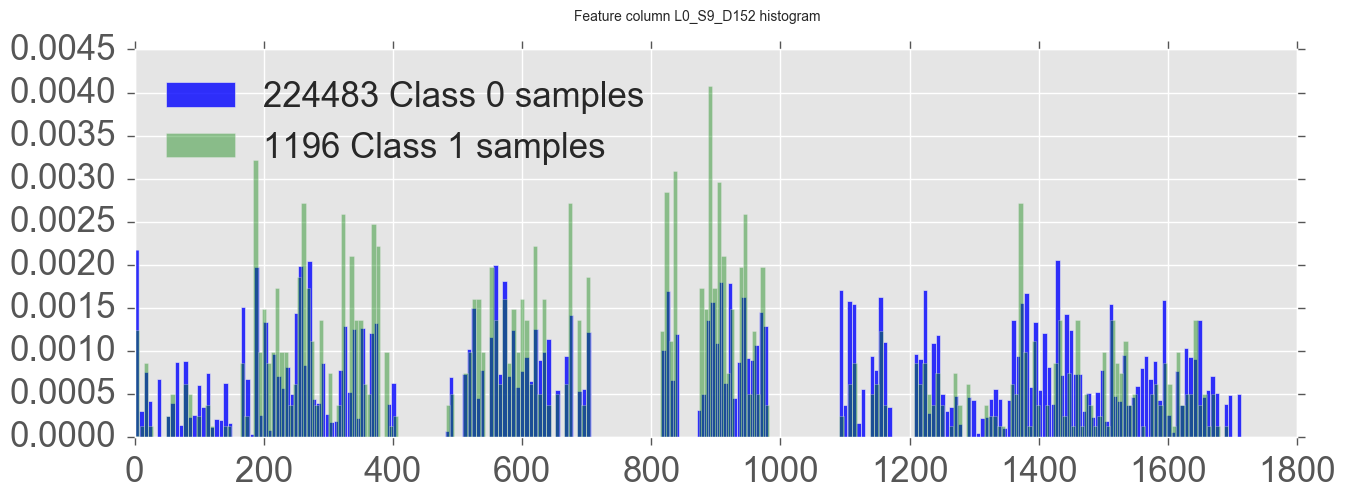

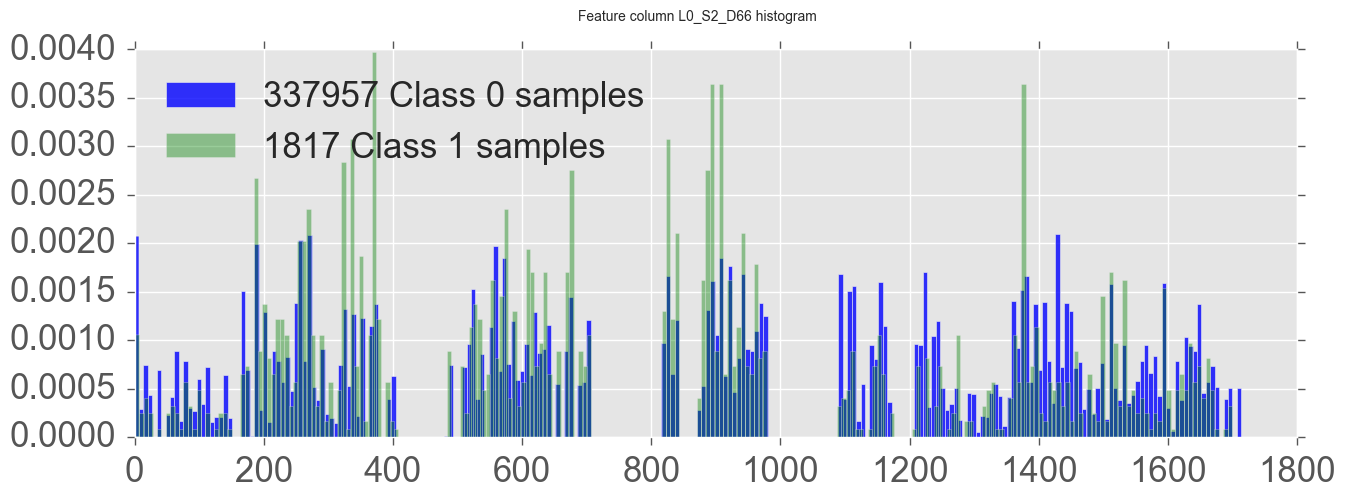

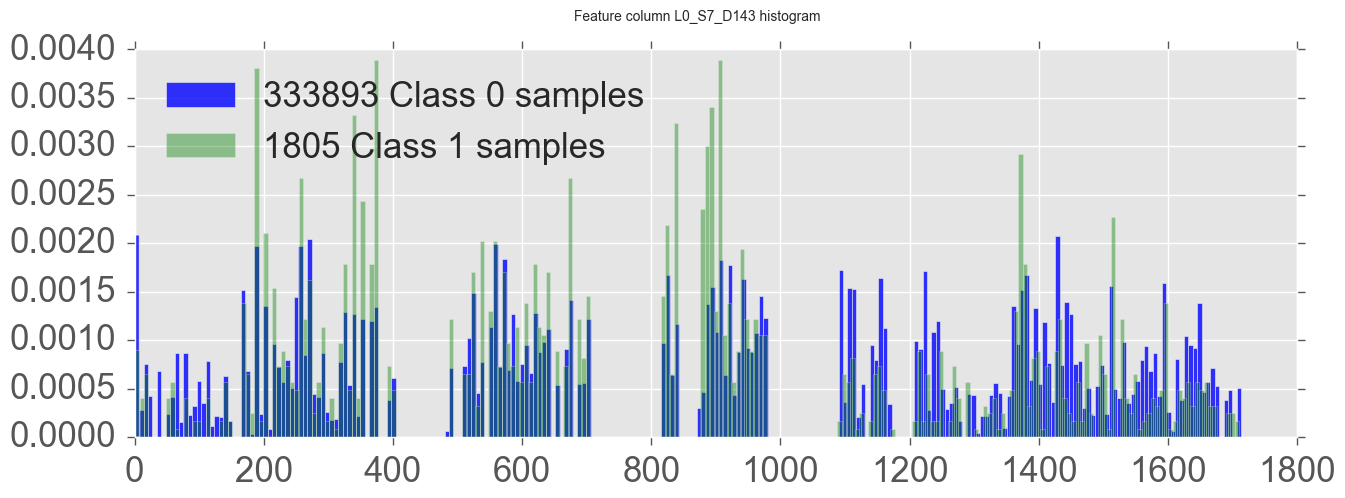

In [55]:
for feature in feature_names:
    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    # Plot linear scale feature density
    train.loc[:, feature][(train.Response == 0)].dropna().hist(bins=250, alpha=0.8, color='b', normed=True, #ax=axes[0],
                                                        label='%d Class 0 samples' % len(train.loc[:, feature][(train.Response == 0)].dropna()))
    train.loc[:, feature][(train.Response == 1)].dropna().hist(bins=250, alpha=0.4, color='g', normed=True, #ax=axes[0],
                                                         label='%d Class 1 samples' % len(train.loc[:, feature][(train.Response == 1)].dropna()))
    
    axes.legend(loc='upper left')
    plt.suptitle('Feature column {} histogram'.format(feature), fontsize=10)
    plt.show()   